### Perceptron in Python - Machine Learning From Scratch 06

https://www.youtube.com/watch?v=t2ym2a3pb_Y

<img src="images/perceptron.png">

#### Linear model

$f(w,b) = w^T + b$


#### Activation Function

Unit Step function

$$
\begin{equation}
g(z) =
\begin{cases}
  1, & \text{if }
       \begin{aligned}[t]
       z& >= 0
       \end{aligned}
\\
  0, & \text{otherwise}
\end{cases}
\end{equation}
$$
<img src="images/step.png">

#### Approximation

$\hat y = g(f(w,b)) = g(w^Tx + b)$


#### Perceptron update rule
for each training sample $x_i$ :

$w = w + \Delta w$

$\Delta w = \alpha \cdot (y_i - \hat y_i)$

$\alpha$ : learning rate in $(0,1)$





#### When I derive - I get completely different weights (though proportional)

$
 cost = J = (1/m) \cdot \sum_k^m -y_k log(\hat y_k) - (1-y_k) log(1- \hat y_k)
$

$
\begin{align}
    \frac{\partial J}{\partial w_i} 
      & = (1/m) \cdot \sum_{k=1}^m - \frac{y_k }{\hat y_k} \frac{\partial \hat y_k}{\partial w_i}
      + \frac{1 - y_k }{1 - \hat y_k} \frac{\partial \hat y_k}{\partial w_i} \\
      & = (1/m) \cdot\sum_{k=1}^m \left( - \frac{y_k }{\hat y_k} 
      + \frac{1 - y_k }{1 - \hat y_k} \right) \frac{\partial \hat y_k}{\partial w_i} \\
      & = (1/m) \cdot\sum_{k=1}^m \left(  \frac{\hat y_k  - y_k}{\hat y_k(1- \hat y_k)} 
       \right) \frac{\partial \hat y_k}{\partial w_i} 
\end{align}
$

similar should be

$
\begin{align}
\frac{\partial J}{\partial b} & = (1/m) \cdot\sum_{k=1}^m \left(  \frac{\hat y_k  - y_k}{\hat y_k (1- \hat y_k)} 
       \right) \frac{\partial \hat y_k}{\partial b} 
\end{align}
$

where $\hat y = g(f(w,b)) = g(w^Tx + b)$

$
\begin{align}
    \frac{\partial \hat y_k}{\partial w_i} & = \frac{\partial \hat y_k}{\partial f}\frac{\partial  f}{\partial w_i}
\end{align}
$

and

$
\begin{align}
    \frac{\partial \hat y_k}{\partial b} & = \frac{\partial \hat y_k}{\partial f}\frac{\partial  f}{\partial b}
\end{align}
$






**In case of step activation function:**

$\begin{align} \frac{\partial \hat y_k}{\partial f} = 1 \end{align}$


$
\implies 
\begin{align}
    \frac{\partial \hat y_k}{\partial w_i} & = 1 \cdot \frac{\partial  f}{\partial w_i} &= x_i\\
    \frac{\partial \hat y_k}{\partial b} & = 1 \cdot \frac{\partial  f}{\partial b} &= 1
\end{align}
$


$
\begin{align}
\frac{\partial J}{\partial w_i} & =  (1/m) \cdot\sum_{k=1}^m \left(  \frac{\hat y_k  - y_k}{\hat y_k(1- \hat y_k)} \right) \frac{\partial \hat y_k}{\partial w_i} 
& =  (1/m) \cdot\sum_{k=1}^m \left(  \frac{\hat y_k  - y_k}{\hat y_k(1- \hat y_k)} \right) x_i
\end{align}
$ 

$
\begin{align}
\frac{\partial J}{\partial b} & =  (1/m) \cdot\sum_{k=1}^m \left(  \frac{\hat y_k  - y_k}{\hat y_k(1- \hat y_k)} \right) \frac{\partial \hat y_k}{\partial b} 
& =  (1/m) \cdot\sum_{k=1}^m \left(  \frac{\hat y_k  - y_k}{\hat y_k(1- \hat y_k)} \right) \cdot 1
\end{align}
$    

But note that this does not hold when activation is  unit step function, because makes denominators 0 when $\hat y_k = y_k$.


**In case of sigmoid activation function:**


$\hat y =  g(f) = \sigma(f) = \frac{1}{1+e^{-f}}$ 

$\begin{align} \frac{\partial \hat y_k}{\partial f} = \sigma(f) \cdot ( 1- \sigma(f)) \end{align} $




$
\implies 
\begin{align}
    \frac{\partial \hat y_k}{\partial w_i} & = \frac{\partial \hat y_k}{\partial f} \cdot \frac{\partial  f}{\partial w_i} &=  \sigma(f) \cdot ( 1- \sigma(f)) \cdot x_i\\
    \frac{\partial \hat y_k}{\partial b} & = \frac{\partial \hat y_k}{\partial f} \cdot \frac{\partial  f}{\partial b} &=  \sigma(f) \cdot ( 1- \sigma(f)) \cdot 1
\end{align}
$


$
\begin{align}
    \frac{\partial J}{\partial w_i} 
      & = (1/m) \cdot\sum_{k=1}^m \left(  \frac{\hat y_k  - y_k}{\hat y_k(1- \hat y_k)} 
       \right) \frac{\partial \hat y_k}{\partial w_i} 
      & = (1/m) \cdot\sum_{k=1}^m \left(  \frac{\hat y_k  - y_k}{\hat y_k(1- \hat y_k)} 
       \right) \sigma(f) \cdot ( 1- \sigma(f))
\end{align}
$


$
\begin{align}
    \frac{\partial J}{\partial b} 
      & = (1/m) \cdot\sum_{k=1}^m \left(  \frac{\hat y_k  - y_k}{\hat y_k(1- \hat y_k)} 
       \right) \frac{\partial \hat y_k}{\partial b} 
      & = (1/m) \cdot\sum_{k=1}^m \left(  \frac{\hat y_k  - y_k}{\hat y_k(1- \hat y_k)} 
       \right) \sigma(f) \cdot ( 1- \sigma(f)) \cdot x_i
\end{align}
$


In [1]:
import numpy as np


class Perceptron:
    def __init__(self, learning_rate = 0.01, n_iters = 1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func =self._unit_step_func
        self.weights = None
        self.bias = None
        
        
    # it works for one samle as well as multiple sample
    def _unit_step_func(self, x):
        return np.where(x >= 0, 1, 0)
    
    def fit(self, X, y):
        # X is ndarray n x m
        n_samples, n_features = X.shape
        # init weights
        self.weights = np.zeros(n_features)
        self.bias = 0.0
        
        # y should be only 0/1
        y_ = [1 if i > 0 else 0 for i in y]
        
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)
                update = self.lr * ( y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update
        pass
    
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        # activation
        y_pred = self.activation_func(linear_output)
        return y_pred
    
    
        

In [2]:
#### Let us test
from sklearn.model_selection import train_test_split
from sklearn import datasets

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

X, y = datasets.make_blobs(n_samples=150,
                           n_features=2,
                           centers=2,
                           cluster_std=1.05,random_state=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


In [3]:
p = Perceptron(learning_rate=0.001, n_iters=1000)
p.fit(X_train, y_train)
predictions = p.predict(X_test)

In [4]:
print("Perceptron classification accuracy", accuracy(y_test, predictions))


Perceptron classification accuracy 1.0


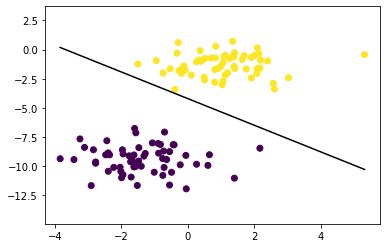

In [5]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.scatter(X_train[:,0], X_train[:,1],marker='o',c=y_train)

x0_1 = np.amin(X_train[:,0])
x0_2 = np.amax(X_train[:,0])

x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]


ax.plot([x0_1, x0_2],[x1_1, x1_2], 'k')

ymin = np.amin(X_train[:,1])
ymax = np.amax(X_train[:,1])
ax.set_ylim([ymin-3,ymax+3])

plt.show()

In [6]:
class MyPerceptron:
    def __init__(self, learning_rate = 0.01, n_iters = 1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func =self._sigmoid_func
        self.weights = None
        self.bias = None
        
    # gives sigmoid value of all in one go
    def _sigmoid_func(self, x):
        #print(f"x.shape {x.shape} weights.shape{self.weights.shape}" )
        zs = np.dot(x, self.weights) + self.bias
        #print(f"zs.shape {zs.shape}" )
        sig = 1/(1+np.exp(-zs))
        return sig
    
    def fit(self, X, y):
        # X is ndarray n x m
        n_samples, n_features = X.shape
        # init weights
        self.weights = np.zeros(n_features)
        self.bias = 0.0
        
        # y should be only 0/1
        y_ = [1 if i > 0 else 0 for i in y]
        #print("Info : self.n_iters = 1")
        for _ in range(self.n_iters):
            # all predictions
            y_hat = self.activation_func(X)
            sig = self._sigmoid_func(X)
            vect = (((y_hat - y_)/y_hat)/(1.0-y_hat)) * sig * (1 - sig)
            res_w = np.dot(X.T, vect)
            #print(f"y_hat.shape:{y_hat.shape} sig:{sig.shape} \
            #        vect:{vect.shape} res_w.shape{res_w.shape} \
            #        ")
            res_b = np.sum(vect)
            self.weights = self.weights - res_w * self.lr 
            self.bias = self.bias - res_b * self.lr 
            #self.bias += update
            
    def predict(self, X):
        y_pred = self.activation_func(X)
        return np.where(y_pred >= 0.5, 1, 0)

In [7]:
myp = MyPerceptron(learning_rate=0.01, n_iters=1000)
myp.fit(X_train, y_train)
mypercep_predict_test = myp.predict(X_test)
print("Perceptron classification accuracy", accuracy(y_test, mypercep_predict_test))

#myp._sigmoid_func(X_train)

Perceptron classification accuracy 1.0


In [8]:
#### Let me check accuracy with iterations

iters = range(1, 1000, 5)
accuracies = []
for it in iters:
    myp = MyPerceptron(learning_rate=0.001, n_iters=it)
    myp.fit(X_train, y_train)
    mypercep_predict_test = myp.predict(X_test)
    acc = accuracy(y_test, mypercep_predict_test)
    accuracies.append(acc)
    #print("Perceptron classification accuracy", accuracy(y_test, mypercep_predict_test))

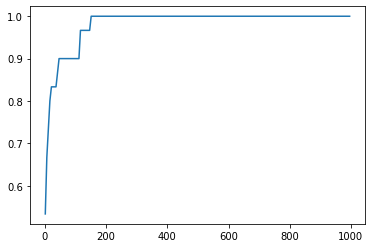

In [9]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot(iters, accuracies)


#### Step function update rule - which was not mentioned in video - is here (found in stackexchange)

https://stats.stackexchange.com/questions/138229/from-the-perceptron-rule-to-gradient-descent-how-are-perceptrons-with-a-sigmoid

$ J(w) = \sum_i (y_i - \hat y_i)^2$

$ \implies
\begin{align}
\frac{\partial J }{\partial w_k} & = 2 \sum_i (y_i - \hat y_i) \frac{\partial \hat y_i}{\partial w_k} & = -2 \sum (y_i - \hat y_i) x_k\\
\frac{\partial J }{\partial b} & = 2 \sum_i (y_i - \hat y_i) \frac{\partial \hat y_i}{\partial b} & = -2 \sum (y_i - \hat y_i) \cdot 1
\end{align}
$

Therefore update rule 

$w_k = w_k - \Delta w_k = w_k  - (-\eta \sum_i (y_i - \hat y_i) x_k) = w_k  +\eta \sum_i (y_i - \hat y_i) x_k$

and

$b = b - \Delta b = b - (-\eta \sum_i (y_i - \hat y_i) ) = b +\eta \sum_i (y_i - \hat y_i) $
